In [281]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.transform import jitter
from bokeh.models import ColumnDataSource, Select
from bokeh.palettes import Colorblind
from bokeh.layouts import layout, column, row

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from datetime import datetime
sb.set_theme(style="whitegrid")
sb.set(rc={'figure.figsize':(14,8.27)})

In [288]:
players_df = pd.read_csv(r"C:\Users\jacks\Development\Python\jcrs-blog\_notebooks\person.csv")
nhl_stats_df = pd.read_csv(r"C:\Users\jacks\Development\Python\jcrs-blog\_notebooks\playerStats.csv")
nhl_stats_df = nhl_stats_df[(nhl_stats_df['league_id'] == 133) & (nhl_stats_df['games'] > 9)]
nhl_stats_df = nhl_stats_df.groupby(['person_id', 'year']).max().reset_index().sort_values(by=['person_id','year'])
nhl_stats_df['years_in_nhl'] = nhl_stats_df.groupby('person_id').cumcount()+1
stats = pd.merge(left=players_df, right=nhl_stats_df, on='person_id')
years = sorted(stats['years_in_nhl'].unique())

In [321]:
stats['points'] = stats['goals'] + stats['assists']
rename_map = {
    'power_play_goals': 'power play goals',
    'power_play_assists': 'power play assists',
    'game_winning_goals': 'game winning goals',
    'short_handed_goals': 'short handed goals',
    'short_handed_assists': 'short handed assists',
    'blocked_shots': 'blocked shots',
    'plus_minus': 'plus minus',
}
stats = stats.rename(columns=rename_map)

stats['power play points'] = stats['power play goals'] + stats['power play assists']
stats['short handed points'] = stats['short handed goals'] + stats['short handed assists']

x_axis_values = [
    'goals',
    'power play goals',
    'short handed goals',
    'game winning goals',
    'assists',
    'power play assists',
    'short handed assists',
    'points',
    'power play points',
    'short handed points',
    'shots',
    'hits',
    'pim',
    'blocked shots',
    'plus minus',
    'shifts',
    'games',
    'weight'
]

In [323]:
df_dict = {}
for x_axis_value in x_axis_values:
    df = stats[[x_axis_value, 'years_in_nhl']]
    group_df = df.groupby('years_in_nhl')
    quantiles_df = pd.DataFrame()
    quantiles_df['floor'] = group_df.quantile(0)
    quantiles_df['q1'] = group_df.quantile(0.25)
    quantiles_df['q2'] = group_df.quantile(0.5)
    quantiles_df['q3'] = group_df.quantile(0.75)
    quantiles_df['roof'] = group_df.quantile(1)
    df_dict[x_axis_value] = quantiles_df
line_df = df_dict['goals']

initial_selection = 'goals'
selections = ColumnDataSource(data = dict(selected=[initial_selection]))
initial_df = stats[[initial_selection, 'years_in_nhl']]
source = ColumnDataSource(initial_df)

In [324]:
x_select = Select(options=x_axis_values, width=420, height=30)

p = figure(width=900, height=300)
p.xaxis.ticker = years
p.xaxis.axis_label = "Years in the NHL"
y_axis_value = 'goals'
p.yaxis.axis_label = y_axis_value

line_source = ColumnDataSource(line_df)
p.scatter(x=jitter('years_in_nhl', 0.55), y='goals', size=5, alpha=0.05, source=source, color=Colorblind[8][0])
line_width = 0.9

boxplot_color = Colorblind[8][7]
p.rect('years_in_nhl', 'q1', source=line_df, color=boxplot_color,
       width=line_width, height=0.2)
p.rect('years_in_nhl', 'q2', source=line_df, color=boxplot_color,
       width=line_width, height=0.2)
p.rect('years_in_nhl', 'q3', source=line_df, color=boxplot_color,
       width=line_width, height=0.2)
p.vbar(source=line_source, x='years_in_nhl',top='q3', bottom='q1', line_alpha=0.5,
       fill_alpha=0, width=0.75, line_color=boxplot_color)
p.segment(x0='years_in_nhl', y0='q3', x1='years_in_nhl', y1='roof', 
          source=line_source, color=boxplot_color, width=0.5)
p.segment(x0='years_in_nhl', y0='floor', x1='years_in_nhl', y1='q1', 
          source=line_source, color=boxplot_color, width=0.5)

show(layout(column(x_select, p)))

In [37]:
plt.figure(figsize=(12, 12))
kmeans = KMeans(n_clusters=10)
y_pred = kmeans.fit_predict(X)

<Figure size 864x864 with 0 Axes>

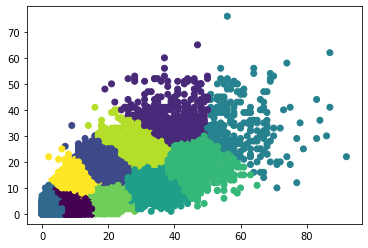

In [39]:
plt.scatter(X['assists'], X['goals'], c=y_pred)

In [104]:
from bokeh.layouts import column
from bokeh.plotting import figure, show
from bokeh.sampledata.autompg import autompg
from bokeh.transform import jitter

years = sorted(autompg.yr.unique())

p1 = figure(width=600, height=300, title="Years vs mpg without jittering")
p1.xgrid.grid_line_color = None
p1.xaxis.ticker = years
p1.scatter(x='yr', y='mpg', size=9, alpha=0.4, source=autompg)

p2 = figure(width=600, height=300, title="Years vs mpg with jittering")
p2.xgrid.grid_line_color = None
p2.xaxis.ticker = years
p2.scatter(x=jitter('yr', 0.4), y='mpg', size=9, alpha=0.4, source=autompg)

type(years[0])

numpy.int64